# PART 1A - REAL LIFE EXAMPLES

In [46]:
!pip install networkx matplotlib


# 1. Factor de Confusión

**Definición:**  
Un confusor es una variable que afecta tanto a la variable explicativa (X) como a la variable de resultado (Y).  
Si no se controla, genera una relación espuria o sesgada.

**Ejemplo económico:**  
- **X** = Años de educación  
- **Y** = Ingreso mensual  
- **C** = Nivel socioeconómico del hogar  

**Explicación:**  
El nivel socioeconómico afecta la posibilidad de estudiar (X) y también los ingresos futuros (Y).  
Si no controlamos C, sobrestimamos el efecto puro de la educación en el ingreso.

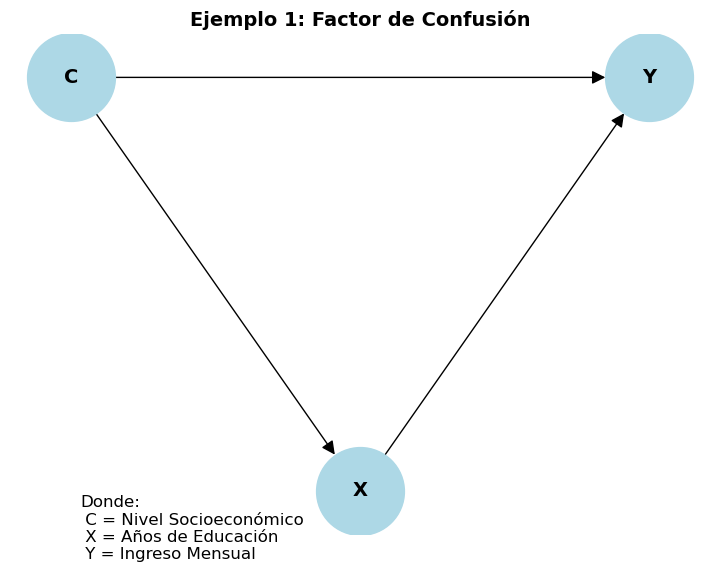

In [50]:
import matplotlib.pyplot as plt
import networkx as nx

def grafo_confusion():
    G = nx.DiGraph()
    G.add_edges_from([
        ("C", "X"),
        ("C", "Y"),
        ("X", "Y")
    ])

    pos = {"C": (0,1), "X": (1,0), "Y": (2,1)}

    plt.figure(figsize=(7,5))
    nx.draw(
        G, pos,
        with_labels=True,
        labels={"C": "C", "X": "X", "Y": "Y"},
        node_size=4000,
        node_color="lightblue",
        font_size=14,
        font_weight="bold",
        arrowsize=20
    )
    plt.title("Ejemplo 1: Factor de Confusión", fontsize=14, weight="bold")
    plt.figtext(0.1, -0.05,
                "Donde:\n C = Nivel Socioeconómico\n X = Años de Educación\n Y = Ingreso Mensual",
                ha="left", fontsize=12)
    plt.show()

grafo_confusion()


# 2. Colisionador

**Definición:**  
Un colisionador es una variable que es efecto común de dos variables.  
Si condicionamos en ella, abrimos un camino espurio entre X y Y.

**Ejemplo económico:**  
- **X** = Productividad individual  
- **Y** = Acceso a redes sociales de élite  
- **C** = Ser contratado en un banco de inversión  

**Explicación:**  
La contratación (C) depende tanto de la productividad (X) como de las redes (Y).  
Si condicionamos en “haber sido contratado”, podemos inducir una correlación artificial entre productividad y redes, aunque no exista causalidad directa.


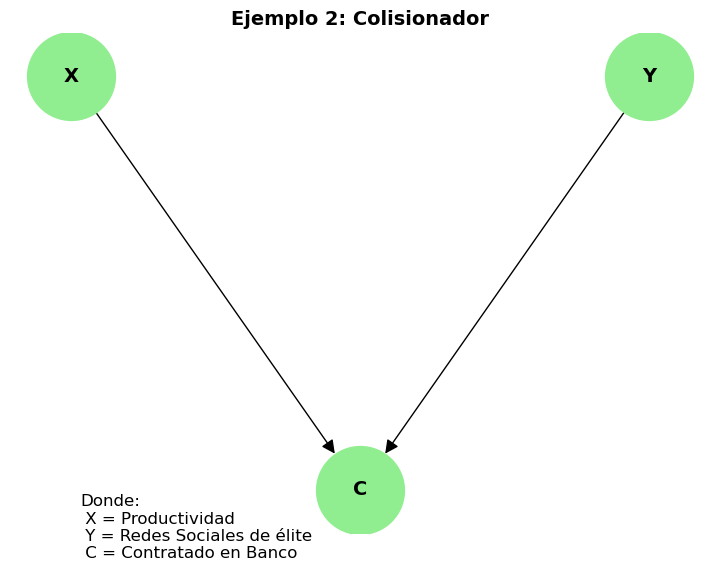

In [52]:
def grafo_colisionador():
    G = nx.DiGraph()
    G.add_edges_from([
        ("X", "C"),
        ("Y", "C")
    ])

    pos = {"X": (0,1), "Y": (2,1), "C": (1,0)}

    plt.figure(figsize=(7,5))
    nx.draw(
        G, pos,
        with_labels=True,
        labels={"X": "X", "Y": "Y", "C": "C"},
        node_size=4000,
        node_color="lightgreen",
        font_size=14,
        font_weight="bold",
        arrowsize=20
    )
    plt.title("Ejemplo 2: Colisionador", fontsize=14, weight="bold")
    plt.figtext(0.1, -0.05,
                "Donde:\n X = Productividad\n Y = Redes Sociales de élite\n C = Contratado en Banco",
                ha="left", fontsize=12)
    plt.show()   
    
grafo_colisionador()

# 3. Mediación

**Definición:**  
Una variable mediadora transmite parte del efecto de X sobre Y.

**Ejemplo económico:**  
- **X** = Inversión en infraestructura pública  
- **M** = Productividad de las empresas  
- **Y** = Crecimiento económico regional  

**Explicación:**  
La inversión pública (X) incrementa la productividad (M), y esta a su vez genera crecimiento económico (Y).  
El efecto total se compone de un efecto directo (X → Y) y un efecto indirecto vía M.

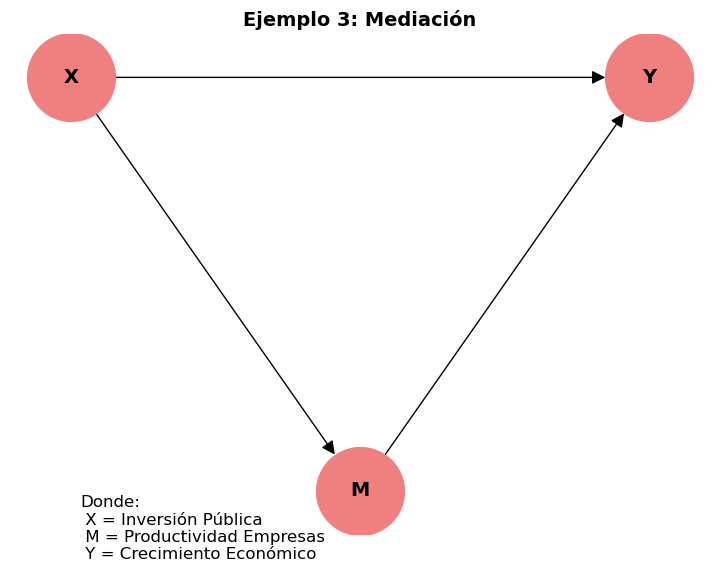

In [54]:
def grafo_mediacion():
    G = nx.DiGraph()
    G.add_edges_from([
        ("X", "M"),
        ("M", "Y"),
        ("X", "Y")
    ])

    pos = {"X": (0,1), "M": (1,0), "Y": (2,1)}

    plt.figure(figsize=(7,5))
    nx.draw(
        G, pos,
        with_labels=True,
        labels={"X": "X", "M": "M", "Y": "Y"},
        node_size=4000,
        node_color="lightcoral",
        font_size=14,
        font_weight="bold",
        arrowsize=20
    )
    plt.title("Ejemplo 3: Mediación", fontsize=14, weight="bold")
    plt.figtext(0.1, -0.05,
                "Donde:\n X = Inversión Pública\n M = Productividad Empresas\n Y = Crecimiento Económico",
                ha="left", fontsize=12)
    plt.show()

grafo_mediacion()

# PART 1B - SIMPSON'S PARADOX

Pendientes (b) e interceptos (a):
Grupo A: b_A = 0.429 > 0, a_A = 20.440
Grupo B: b_B = 0.628 > 0, a_B = -16.309
Pooled  : b_P = -5.257  (debería ser < 0), a_P = 31.399


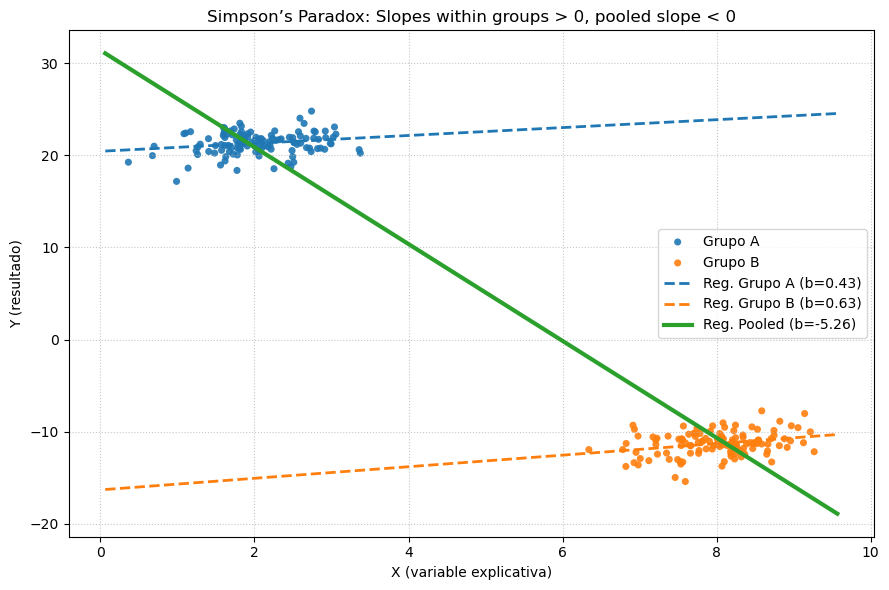

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1) Simulación reproducible
rng = np.random.default_rng(123)

nA, nB = 120, 120
# Grupo A: X bajo, Y alto; pendiente interna positiva
XA = rng.normal(loc=2.0, scale=0.6, size=nA)
YA = 20.0 + 0.6*XA + rng.normal(0, 1.2, size=nA)

# Grupo B: X alto, Y bajo; pendiente interna positiva
XB = rng.normal(loc=8.0, scale=0.6, size=nB)
YB =  2.0 + 0.6*XB + rng.normal(0, 1.2, size=nB) - 18.0  # gran caída del nivel para forzar la paradoja

dfA = pd.DataFrame({"X": XA, "Y": YA, "group": "A"})
dfB = pd.DataFrame({"X": XB, "Y": YB, "group": "B"})
df  = pd.concat([dfA, dfB], ignore_index=True)

# 2) Ajustes OLS con scikit-learn (equivalente a mínimos cuadrados)
def fit_line(x, y):
    m = LinearRegression().fit(x.reshape(-1,1), y)
    return float(m.coef_[0]), float(m.intercept_), m

bA, aA, mA = fit_line(dfA["X"].values, dfA["Y"].values)
bB, aB, mB = fit_line(dfB["X"].values, dfB["Y"].values)
bP, aP, mP = fit_line(df["X"].values,  df["Y"].values)

# 3) Rectas para el gráfico
xgrid = np.linspace(df["X"].min()-0.3, df["X"].max()+0.3, 200)
yA_hat = aA + bA*xgrid
yB_hat = aB + bB*xgrid
yP_hat = aP + bP*xgrid

# 4) Gráfico único con todo
plt.figure(figsize=(9,6))

# puntos por grupo
plt.scatter(dfA["X"], dfA["Y"], s=26, alpha=0.9, label="Grupo A", edgecolor="none")
plt.scatter(dfB["X"], dfB["Y"], s=26, alpha=0.9, label="Grupo B", edgecolor="none")

# líneas de regresión
plt.plot(xgrid, yA_hat, linestyle="--", linewidth=2, label=f"Reg. Grupo A (b={bA:.2f})")
plt.plot(xgrid, yB_hat, linestyle="--", linewidth=2, label=f"Reg. Grupo B (b={bB:.2f})")
plt.plot(xgrid, yP_hat, linestyle="-",  linewidth=3, label=f"Reg. Pooled (b={bP:.2f})")

plt.title("Simpson’s Paradox: Slopes within groups > 0, pooled slope < 0")
plt.xlabel("X (variable explicativa)")
plt.ylabel("Y (resultado)")
plt.legend(loc="best", frameon=True)
plt.grid(True, linestyle=":", linewidth=0.8, alpha=0.7)
plt.tight_layout()
plt.show()

# Pendientes (b) e interceptos (a):
1. Grupo A: b_A = 0.429 > 0, a_A = 20.440
2. Grupo B: b_B = 0.628 > 0, a_B = -16.309
3. Pooled  : b_P = -5.257  (debería ser < 0), a_P = 31.399

# Nota conceptual breve:
Dentro de cada grupo (A y B), Y aumenta con X (pendientes positivas).
Pero como el grupo B tiene X alto y un nivel de Y mucho más bajo por su intercepto, al juntar los datos, el “gradiente” global se inclina hacia abajo y la pendiente pooled sale negativa.


In [105]:
# -----------------------------
# 3) Regressions requeridas
#    Guardamos el coef. de X, su IC al 99% y significancia al 1%.
# -----------------------------
def run_ols(y, Xvars, data):
    Xmat = sm.add_constant(data[Xvars])
    model = sm.OLS(data[y], Xmat).fit()
    b = model.params["X"]
    se = model.bse["X"]
    # IC 99%
    tcrit = stats.t.ppf(1 - 0.01/2, df=len(data) - Xmat.shape[1])
    lo, hi = b - tcrit*se, b + tcrit*se
    sig1 = (lo > 0) or (hi < 0)   # excluye cero al 1%
    return b, se, lo, hi, sig1, model

specs = [
    ("(1) Y ~ X"                 , ["X"]),
    ("(2) Y ~ X + Z1"            , ["X","Z1"]),
    ("(3) Y ~ X + Z2"            , ["X","Z2"]),
    ("(4) Y ~ X + Z1 + Z2"       , ["X","Z1","Z2"]),
    ("(5) Y ~ X + Z1 + Z2 + Z3"  , ["X","Z1","Z2","Z3"]),
]

rows = []
models = {}
for name, Xvars in specs:
    b, se, lo, hi, sig1, m = run_ols("Y", Xvars, df)
    rows.append({"spec": name, "beta_X": b, "se_X": se, "lo99": lo, "hi99": hi, "sig@1%": sig1})
    models[name] = m

res = pd.DataFrame(rows)
print("Efecto verdadero de X→Y = 1.0")
print(res.to_string(index=False, float_format=lambda v: f"{v:,.3f}"))

Efecto verdadero de X→Y = 1.0
                    spec  beta_X  se_X  lo99  hi99  sig@1%
               (1) Y ~ X   2.000 0.013 1.968 2.033    True
          (2) Y ~ X + Z1   2.013 0.014 1.976 2.049    True
          (3) Y ~ X + Z2   1.484 0.014 1.447 1.520    True
     (4) Y ~ X + Z1 + Z2   0.991 0.017 0.946 1.036    True
(5) Y ~ X + Z1 + Z2 + Z3   1.004 0.014 0.968 1.040    True


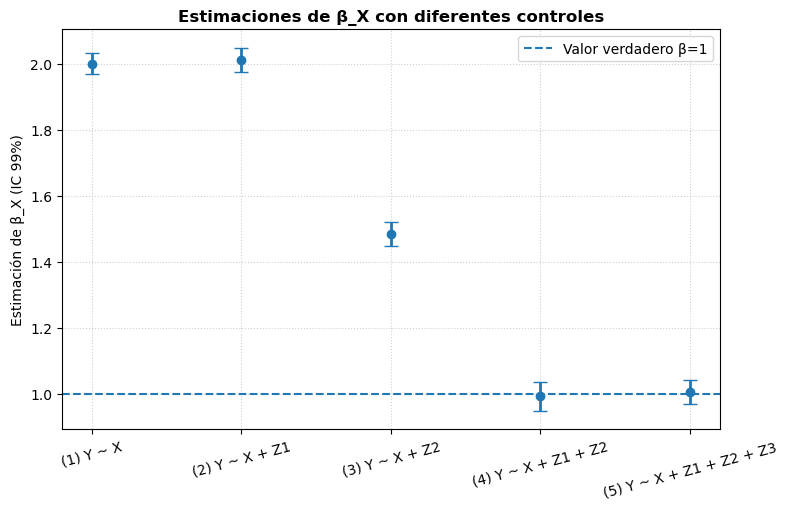

In [107]:
# -----------------------------
# 4) Gráfico: estimaciones puntuales e IC 99% de β_X
# -----------------------------
plt.figure(figsize=(8,5.2))
x = np.arange(len(res))
y = res["beta_X"].values
yerr = np.vstack([y - res["lo99"].values, res["hi99"].values - y])

plt.errorbar(x, y, yerr=yerr, fmt="o", capsize=5, linewidth=2)
plt.axhline(1.0, linestyle="--", linewidth=1.5, label="Valor verdadero β=1")
plt.xticks(x, res["spec"].values, rotation=15)
plt.ylabel("Estimación de β_X (IC 99%)")
plt.title("Estimaciones de β_X con diferentes controles", weight="bold")
plt.grid(True, linestyle=":", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# Comentario breve (en consola)
Está sesgado porque Z1, Z2 y Z3 causan Y y además Z1 y Z2 causan X.
Agregar Z1 o Z2 reduce el sesgo parcialmente. Con Z1+Z2 el sesgo casi desaparece.
Incluir Z3 también ayuda porque Z3 mueve a Y y a Z2 (vía Z3→Z2), cerrando caminos adicionales.

# Respuestas a las preguntas

## 1. ¿Qué regresiones estiman correctamente el efecto de X sobre Y?

Al observar la tabla `res` y el gráfico de intervalos de confianza, las regresiones que entregan un estimador \(\hat{\beta}_X \approx 1\) (el valor verdadero) y con intervalo de confianza al 99% que contiene 1 son:

- **(4) `Y ~ X + Z1 + Z2`**  
- **(5) `Y ~ X + Z1 + Z2 + Z3`**

**Explicación causal:**  
Z1 y Z2 son confusores porque afectan tanto a X como a Y. Al incluirlos como controles, bloqueamos los caminos de back-door. En cambio, Z3 no es confusor de X (no hay flecha Z3 → X), por lo que no es estrictamente necesario incluirlo. Por eso el modelo (4) ya identifica correctamente el efecto.

---

## 2. Tabla resumen para regresiones (4) y (5)

En el código original guardamos los modelos en `models`. Con el siguiente bloque obtenemos los resultados:

```python
# Resúmenes completos
print(models["(4) Y ~ X + Z1 + Z2"].summary())
print(models["(5) Y ~ X + Z1 + Z2 + Z3"].summary())

# Tabla compacta solo para el coeficiente de X
def tabla_x(m):
    ci = m.conf_int(alpha=0.01).loc["X"]
    return pd.Series({
        "beta_X": m.params["X"],
        "se_X": m.bse["X"],
        "t": m.tvalues["X"],
        "p": m.pvalues["X"],
        "lo99": ci[0],
        "hi99": ci[1]
    })

tab45 = pd.DataFrame({
    "(4) X": tabla_x(models["(4) Y ~ X + Z1 + Z2"]),
    "(5) X": tabla_x(models["(5) Y ~ X + Z1 + Z2 + Z3"])
}).T

print(tab45.to_string(float_format=lambda v: f"{v:,.3f}"))


**Comentario esperado:**

- Ambas regresiones entregan \(\hat{\beta}_X \approx 1\), altamente significativas al 1%.  
- La precisión mejora en (5), ya que al incluir Z3 se reduce la varianza residual de Y, lo que disminuye la desviación estándar.  
- No obstante, el modelo (4) ya es suficiente para recuperar el efecto verdadero.  

---

## 3. ¿Se puede ignorar alguna Z y aun así estimar bien?

Sí. Podemos **ignorar Z3** y aún obtener una buena estimación del efecto de X sobre Y.  

**Razones:**
- **Z1 y Z2** son confusores porque influyen tanto en X como en Y. Por lo tanto, deben incluirse en el modelo.  
- **Z3** no es confusor de X, ya que no existe la flecha Z3 → X. Su efecto sobre Y ocurre de forma directa y a través de Z2.  
- El **conjunto de ajuste mínimo** por el criterio de back-door es \(\{Z1, Z2\}\).  

Por eso, la regresión **(4) `Y ~ X + Z1 + Z2`** es suficiente para obtener un estimador correcto y no sesgado del efecto causal de X sobre Y.


# PART 3 - DAMNED IF YOU DO, DAMNED IF YOU DON'T